<a href="https://colab.research.google.com/github/DCarolinaHuertas/AnalisisI/blob/circleci-project-setup/NotebookAvance1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ***Descargar Dataset desde kaggle***

In [ ]:
!pip install kaggle

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from google.colab import files 
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"jhondbv","key":"1ccdc0bb3f7677e8897e6434c2a09254"}'}

In [ ]:
! mkdir ~/.kaggle

In [ ]:
! cp kaggle.json ~/.kaggle/

In [ ]:
! chmod 600 ~/.kaggle/kaggle.json

In [ ]:
! kaggle datasets download 'rounakbanik/the-movies-dataset'

 95% 217M/228M [00:01<00:00, 144MB/s]
100% 228M/228M [00:01<00:00, 131MB/s]


In [ ]:
! unzip the-movies-dataset.zip

Archive:  the-movies-dataset.zip
  inflating: credits.csv             
  inflating: keywords.csv            
  inflating: links.csv               
  inflating: links_small.csv         
  inflating: movies_metadata.csv     
  inflating: ratings.csv             
  inflating: ratings_small.csv       


In [ ]:
! rm the-movies-dataset.zip
! rm kaggle.json

# **Analisis DataSet**

In [ ]:
!pip install scikit-surprise

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import pandas as pd
import numpy as np

In [ ]:
# Crear dataset de movies y ratings 

movies = pd.read_csv('movies_metadata.csv')
ratings = pd.read_csv('ratings_small.csv')
links = pd.read_csv('links.csv')

<ipython-input-110-b574db498c16>:3: DtypeWarning:

Columns (10) have mixed types. Specify dtype option on import or set low_memory=False.



Para escoger un correcto algoritmo se debe explorar los datos , para eso se hace un analisis basico de los datos para saber como estan distribuidos 

GRAPHIC


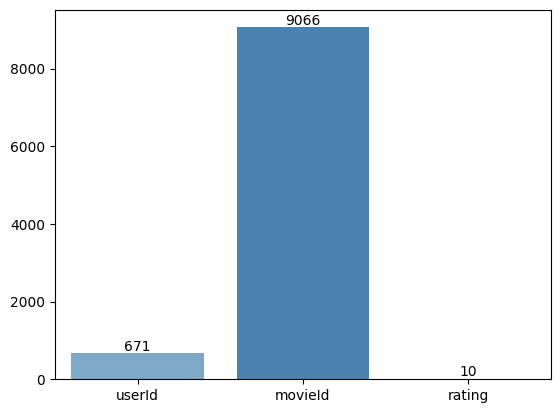

INFORMATION
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100004 entries, 0 to 100003
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   userId     100004 non-null  int64  
 1   movieId    100004 non-null  int64  
 2   rating     100004 non-null  float64
 3   timestamp  100004 non-null  int64  
dtypes: float64(1), int64(3)
memory usage: 3.1 MB
None
UNIQUE DATA
userId         671
movieId       9066
rating          10
timestamp    78141
dtype: int64


In [ ]:
import seaborn as sns
from plotly.offline import init_notebook_mode, iplot
import plotly.graph_objs as go
import matplotlib.pyplot as plt
init_notebook_mode(connected=True)
#Analisando ratings  , cuantos datos unicos hay en cada columna 


print("GRAPHIC")
print("============"*8)

ratings_graphic = ratings.drop("timestamp",axis=1)
ax = sns.barplot(x=ratings_graphic.columns,y=ratings_graphic.nunique(axis=0),palette="Blues_d")
for p in ax.patches:
  ax.annotate( str(p.get_height().astype(int)), 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha = 'center', va = 'center', 
                xytext = (0, 5), 
                textcoords = 'offset points')
plt.show()

print("============"*8)
print("INFORMATION")
print("============"*8)
print(ratings.info())
print("============"*8) 
print("UNIQUE DATA")
print("============"*8)
print(ratings.nunique(axis=0))
print("============"*8)


Que peliculas tienen mas reviews ?

Que usuarios dan mas reviews ?

como luce la distribucion para ratings ?

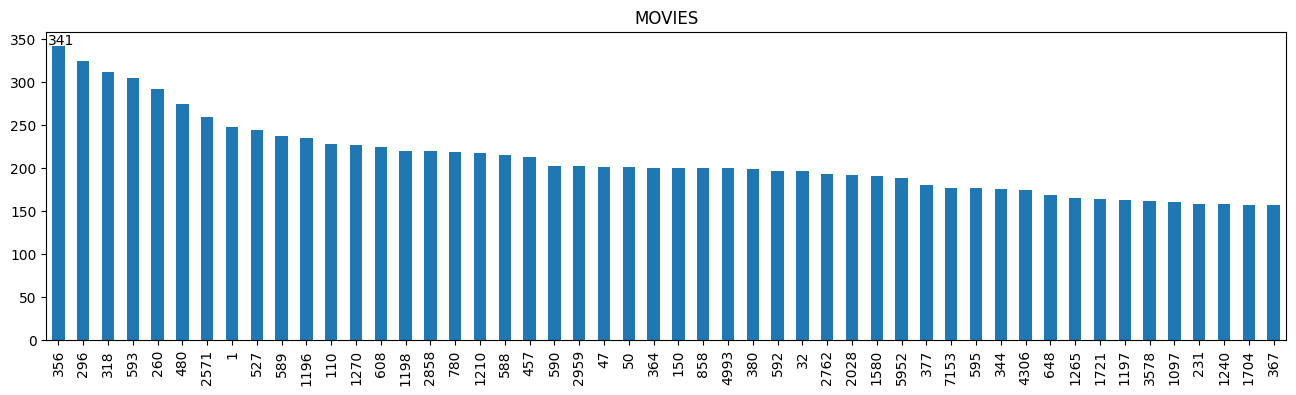

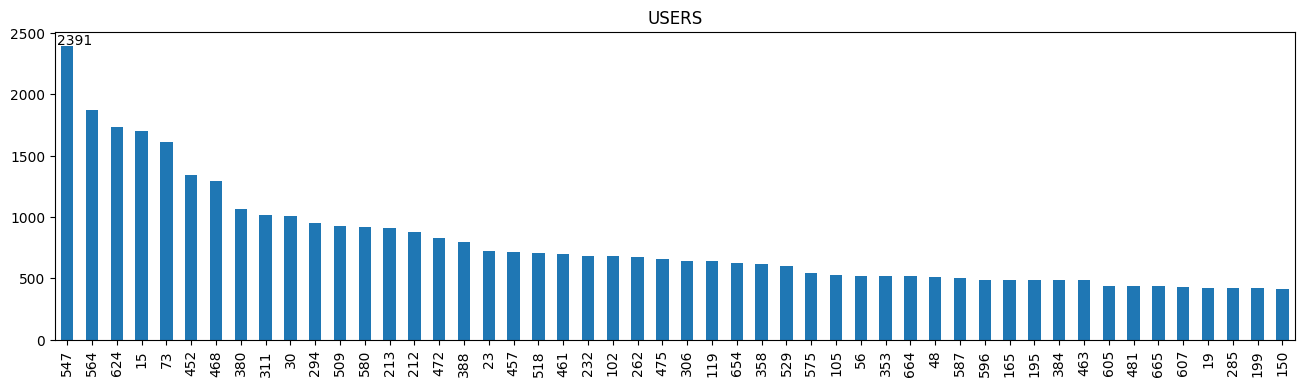

5.0    15095
4.5     7723
4.0    28750
3.5    10538
3.0    20064
2.5     4449
2.0     7271
1.5     1687
1.0     3326
0.5     1101
Name: rating, dtype: int64
Float64Index([5.0, 4.5, 4.0, 3.5, 3.0, 2.5, 2.0, 1.5, 1.0, 0.5], dtype='float64')
[15095  7723 28750 10538 20064  4449  7271  1687  3326  1101]
100004


In [ ]:
plt.figure(1,figsize=(16,4))
plt.title("MOVIES")
j =ratings["movieId"].value_counts()[:50].plot(kind='bar') #toma las primeras 50 peliculas 
p = j.patches[0]
j.annotate( str(p.get_height().astype(int)), 
              (p.get_x() + p.get_width() / 2., p.get_height()), 
              ha = 'center', va = 'center', 
              xytext = (2, 4), 
              textcoords = 'offset points')
plt.show()


plt.figure(2,figsize=(16,4))
plt.title("USERS")
j= ratings["userId"].value_counts()[:50].plot(kind='bar') #toma los primeros 50 usuarios

p = j.patches[0]
j.annotate( str(p.get_height().astype(int)), 
              (p.get_x() + p.get_width() / 2., p.get_height()), 
              ha = 'center', va = 'center', 
              xytext = (5, 4), 
              textcoords = 'offset points')
plt.show()

# plt.figure(3,figsize=(8,4))
# plt.title("DISTRIBUTION")
# j = ratings["rating"].plot(kind='hist') #Distribucion de ratings  
# p = j.patches[0]
# j.annotate( str(p.get_height().astype(int)), 
#               (p.get_x() + p.get_width() / 2., p.get_height()), 
#               ha = 'center', va = 'center', 
#               xytext = (5, 4), 
#               textcoords = 'offset points')
# plt.show()

data = ratings['rating'].value_counts().sort_index(ascending=False)

# Create the trace data
trace = go.Bar(x = data.index,
               text = ['{:.1f} %'.format(val) for val in (data.values / ratings.shape[0] * 100)],
               textposition = 'auto',
               textfont = dict(color = '#000000'),
               y = data.values,
               )
# Create figure layout
layout = dict(title = 'Distribución de {} valoraciones'.format(ratings.shape[0]),
              xaxis = dict(title = 'Valoración'),
              yaxis = dict(title = 'Recuento'))

# Create plot with data and layout
fig = go.Figure(data=[trace], layout=layout)
#iplot(fig)
fig.show(renderer='colab')
print(data)
print(data.index)
print(data.values)
print(ratings.shape[0])

* no todas las peliculas tienen una cantidad parecida de reviews , la pelicula con mas reviews es la 356 , con 350 calificaciones

* Las calificaciones no estan distribuidas uniformemente para los usuarios , el usuario 547 ha dado alrededor de 2400 calificaciones

* La mayoria de usuarios da una calificacion alrededor de 4 

In [ ]:
#Movies with rating bigger than 400, will be set to 400
data = ratings.groupby('movieId')['rating'].count().clip(upper=50)

# Create the trace data
trace = go.Histogram(x = data.values,
                     name = 'Valoraciones',
                     xbins = dict(start = 1,
                                  end = 51,
                                  size = 2))
# Create figure layout
layout = go.Layout(title = 'Distribución de número de valoraciones por película',
                   xaxis = dict(title = 'Número de valoraciones por película'),
                   yaxis = dict(title = 'Recuento'),
                   bargap = 0.2)

# Create plot with data and layout
fig = go.Figure(data=[trace], layout=layout)
#iplot(fig)
fig.show(renderer='colab')


print("Recuento Película-Puntuación (Top 10)")
movie_ratings_count = ratings.groupby('movieId')['rating'].count().reset_index().sort_values('rating', ascending=False)[:10]
print(movie_ratings_count)

print("Número de películas: %s" % ratings.groupby('movieId')['rating'].count().shape[0])


Recuento Película-Puntuación (Top 10)
      movieId  rating
321       356     341
266       296     324
284       318     311
525       593     304
232       260     291
427       480     274
2062     2571     259
0           1     247
472       527     244
522       589     237
Número de películas: 9066


Que distribucion de calificaciones tiene cada pelicula ?
 - El 47% (4265)  de peliculas tienen entre 1 y 2 calificaciones 
 - El 53% del total de peliculas tienen mas de 3 calificaciones
  

In [ ]:
#Users which gave more than 50 ratings, will be cut off to 50
data = ratings.groupby('userId')['rating'].count().clip(upper=50)

# Create the trace data
trace = go.Histogram(x = data.values,
                     name = 'Valoraciones',
                     xbins = dict(start = 0,
                                  end = 51,
                                  size = 2))
# Create figure layout
layout = go.Layout(title = 'Distribución de número de valoraciones por usuario (Límite de 50)',
                   xaxis = dict(title = 'Valoraciones por usuario'),
                   yaxis = dict(title = 'Recuento'),
                   bargap = 0.2)

# Create plot with data and layout
fig = go.Figure(data=[trace], layout=layout)
#iplot(fig)
fig.show(renderer='colab')


print("Recuento Usuario-Puntuación (Top 10)")
user_ratings_count = ratings.groupby('userId')['rating'].count().reset_index().sort_values('rating', ascending=False)[:10]
print(user_ratings_count)

print("Número de usuarios: %s" % ratings.groupby('userId')['rating'].count().shape[0])

Que distribucion de calificaciones tiene cada usuario ?
 - El histograma muestra que la mayoria de usuarios (427 osea un  63% del total 671) 
 tienen 50 o mas calificaciones

# **Limpiando Dataset y seleccionando datos**

In [ ]:
print("=============="*8)
print("MOVIES")
print("=============="*8)
movies.info()
print("=============="*8)
print("RATINGS")
print("=============="*8)
ratings.info()
print("=============="*8)
print("LINKS")
print("=============="*8)
links.info()

MOVIES
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45466 entries, 0 to 45465
Data columns (total 24 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   adult                  45466 non-null  object 
 1   belongs_to_collection  4494 non-null   object 
 2   budget                 45466 non-null  object 
 3   genres                 45466 non-null  object 
 4   homepage               7782 non-null   object 
 5   id                     45466 non-null  object 
 6   imdb_id                45449 non-null  object 
 7   original_language      45455 non-null  object 
 8   original_title         45466 non-null  object 
 9   overview               44512 non-null  object 
 10  popularity             45461 non-null  object 
 11  poster_path            45080 non-null  object 
 12  production_companies   45463 non-null  object 
 13  production_countries   45463 non-null  object 
 14  release_date           45379 non-null  object 


La relacion entre los archivos del dataset es : 

Ratings (movieId) -> Links(movieId)

Links(tmbdId)->Movies(id)

se observa que la columna Movies-id es tipo object , asi que se debe convertir a tipo Int64 para poder hacer efectiva la relacion entre Links-Movies 


In [ ]:
movies["id"] =  pd.to_numeric(movies["id"],errors='coerce').astype('Int64')
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45466 entries, 0 to 45465
Data columns (total 24 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   adult                  45466 non-null  object 
 1   belongs_to_collection  4494 non-null   object 
 2   budget                 45466 non-null  object 
 3   genres                 45466 non-null  object 
 4   homepage               7782 non-null   object 
 5   id                     45463 non-null  Int64  
 6   imdb_id                45449 non-null  object 
 7   original_language      45455 non-null  object 
 8   original_title         45466 non-null  object 
 9   overview               44512 non-null  object 
 10  popularity             45461 non-null  object 
 11  poster_path            45080 non-null  object 
 12  production_companies   45463 non-null  object 
 13  production_countries   45463 non-null  object 
 14  release_date           45379 non-null  object 
 15  re

Para tener un dataset mas limpio , se analizan duplicados , registros faltantes entre las relaciones y datos vacios 

In [ ]:
movies_duplicated = movies.groupby(['id']).size()
print("Peliculas duplicadas : ",movies_duplicated[movies_duplicated>1].shape[0])

ratings_duplicated = ratings.groupby(['userId','movieId']).size()
print("Reviews duplicadas : ",ratings_duplicated[ratings_duplicated>1].shape[0])

links_duplicated = links.groupby(['movieId','tmdbId']).size()
print("Links duplicadas : ",links_duplicated[links_duplicated>1].shape[0])

Peliculas duplicadas :  29
Reviews duplicadas :  0
Links duplicadas :  0


In [ ]:
#Eliminando peliculas duplicadas 
print("cantidad de peliculas antes de eliminar duplicados :",movies.shape[0])
movies = movies.drop_duplicates(["id"])
print("cantidad de peliculas despues de eliminar duplicados :",movies.shape[0])

In [ ]:
#moviesId que existen en ratings pero no en links
ratings_movies_missed =  ratings[~ratings["movieId"].isin(links["movieId"])]
ratings_movies_missed.nunique(axis=0)

userId       32
movieId       8
rating        8
timestamp    45
dtype: int64

In [ ]:
#Id que existen en links pero no en movies
links_movie_missed = links[~links["tmdbId"].isin(movies["id"])]
links_movie_missed.nunique()

movieId    380
imdbId     380
tmdbId     161
dtype: int64

In [ ]:
#Ratings que deben ser descartados ya que no existen peliculas en Movies asociados al movieId en ratings
ratings_missed = ratings[ratings["movieId"].isin(links_movie_missed['movieId'])]
ratings_missed.shape

(148, 4)

In [ ]:
#Eliminacion de ratings innecesarios 
print(ratings.shape[0])
ratings = ratings.drop(index=ratings_missed.index)
ratings = ratings.drop(index= ratings_movies_missed.index)
print(ratings.shape[0])

(99810, 4)

In [ ]:

ratings.shape


(100004, 4)